In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Data Pre-processing**

In [6]:
data['Age'].fillna(data['Age'].median(), inplace=True)


In [7]:
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)

In [8]:
data.drop(['Cabin'],axis=1, inplace=True)

In [9]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Visualizations**

**Survival rate by gender**

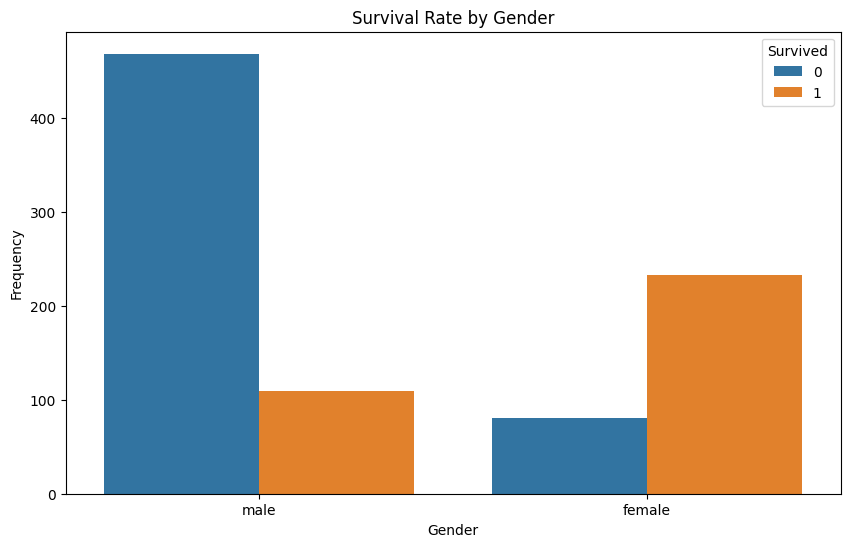

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Survival Rate by Gender')
plt.show()

**Age distribution**

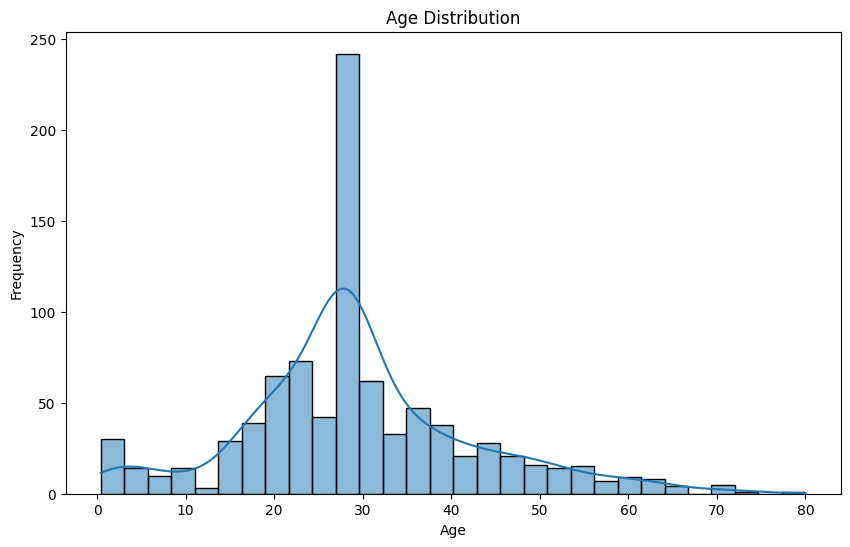

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

**Survival rate by passenger class**

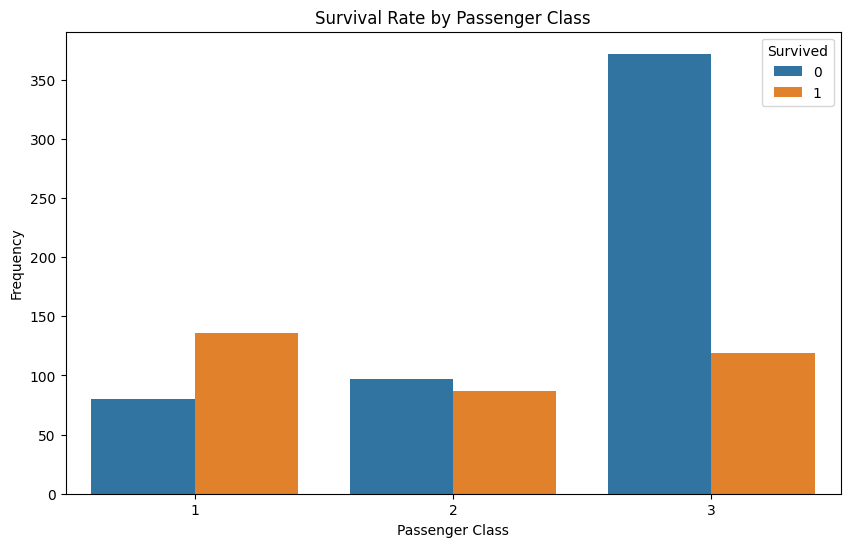

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Survival Rate by Passenger Class')
plt.show()

**Survival rate**

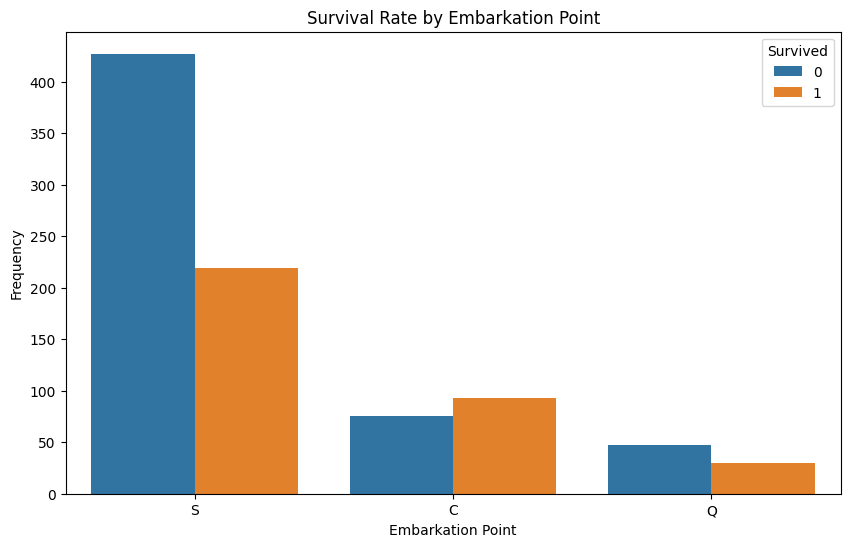

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.xlabel('Embarkation Point')
plt.ylabel('Frequency')
plt.title('Survival Rate by Embarkation Point')
plt.show()

**Data Splitting**

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
data.drop(['PassengerId',  'Pclass', 'Name',  'Age', 'SibSp',
       'Parch', 'Ticket'], axis = 1, inplace = True)

In [19]:
data

,Survived,Sex,Fare,Embarked
0,0,male,7.2500,S
1,1,female,71.2833,C
2,1,female,7.9250,S
3,1,female,53.1000,S
4,0,male,8.0500,S
...,...,...,...,...
886,0,male,13.0000,S
887,1,female,30.0000,S
888,0,female,23.4500,S
889,1,male,30.0000,C


In [28]:
X = data.drop('Survived', axis=1)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
y = data['Survived']

In [29]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Machine Learning models**

**Logistic Regression**

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [34]:
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")

Accuracy: 0.776536312849162


In [35]:
lr_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {lr_confusion_matrix}")

Confusion Matrix: [[87 18]
 [22 52]]


In [36]:
lr_classification_report = classification_report(y_test, y_pred)
print(f"Classification Report: {lr_classification_report}")

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



**Random Forest**

In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = model.predict(X_test)

In [51]:
rf_accuracy = accuracy_score(y_test, y_pred)

In [52]:
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.7877094972067039


In [53]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {rf_confusion_matrix}")

Confusion Matrix: [[88 17]
 [21 53]]


In [54]:
rf_classification_report = classification_report(y_test, y_pred)
print(f"Classification Report: {rf_classification_report}")

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



**Gradient Boosting Classifier**

In [55]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [56]:
y_pred = model.predict(X_test)

In [61]:
gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {gb_accuracy}")

Accuracy: 0.8100558659217877


In [58]:
gb_confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

Confusion Matrix: [[89 16]
 [18 56]]


In [59]:
gb_classification_report = classification_report(y_test, y_pred)
print(f"Classification Report: {gb_classification_report}")

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [63]:
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Classifer Accuracy: {gb_accuracy:.2f}")

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.79
Gradient Boosting Classifer Accuracy: 0.81
